In [ ]:
import sys
sys.path.append('/Users/annasintsova/git_repos/HUTI-RNAseq/code/methods')
import settings


In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import os

def invnorm(x):
    return stats.norm.ppf((x.rank() -0.5)/x.count())

all_counts_directory = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/data/"
files = [ c for c in os.listdir(all_counts_directory) if "trimmed_sorted_counts" in c and "seq" not in c]


import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns;sns.set_style("ticks")
import scipy
from operator import itemgetter
import os

figures_folder = "/Users/annasintsova/git_repos/HUTI-RNAseq/figures/virulence_factor_expression/"
results_folder = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/virulence_factor_expression/"

today = dt.datetime.today().strftime("%Y-%m-%d")

meta_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/data/huti_patient_info_short.csv"
meta = pd.read_csv(meta_file, index_col=0)
meta

def invnorm(x):
    y = x[~np.isnan(x)]  # remove NaN
    norm_y = scipy.stats.norm.ppf((x.rank() -0.5)/x.count()) #Normalize
    #result = [a if np.isnan(a) else norm_y.pop(0) for a in x ]# Put NaNs back
    return norm_y
   

def sample_label(strain, treat, join = " | "):
    return strain+join+treat

col1 = "#f34236"
col2 = "#d6c571"
col3 = "#88bc67"
col4 = "#2e8174"
col5 = "#143969"
clrs = [col1, col2, col3, col4, col5]
my_cmap = LinearSegmentedColormap.from_list('custom blue', [col5, col4, col2,col1], N=256)
ur = "URINE"
uti = "PATIENT"
join = " | "


strain_qual = {'good':["HM56", "HM14", "HM43", "HM54", "HM86"],
              'okay':["HM56", "HM14", "HM43", "HM54", "HM86","HM01", "HM03", "HM06", "HM68"],
              'so-so':["HM57", "HM17", "HM07" "HM60"],
              'bad': ["HM66"]}

meta_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/virulence_factor_expression/virulence_factors_info.txt"
strain_info_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/data/huti_patient_info_short.csv"
meta = pd.read_csv(meta_file, index_col=0, header=None, names=["gene_name", "function"])


In [2]:
df_all = {}
for file in files:
    name = file.split("_trimmed")[0]
    fp = os.path.join(all_counts_directory, file)
    df = pd.read_csv(fp, sep = "\t", header=None, index_col = 0, names = [name])
    df = df.apply(invnorm)
    df_d = df.to_dict()
    df_all = dict(df_all, **df_d) # Adding 2 computers together
len(df_all.keys())

28

In [3]:
cft_pa_matrix_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/"\
                     "results/virulence_factor_expression/2018-05-30_ecc_presence_absence_matrix_prokka.csv"

uti89_pa_matrix_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/"\
                  "results/virulence_factor_expression/2018-05-30_eci_presence_absence_matrix_prokka.csv"
cft_pa_mat = pd.read_csv(cft_pa_matrix_file, index_col=0)
uti89_pa_mat = pd.read_csv(uti89_pa_matrix_file, index_col=0)
pa_mat = pd.concat([cft_pa_mat, uti89_pa_mat])


In [4]:
norm_counts = pa_mat.copy()
norm_counts.shape

(40, 14)

In [5]:
conditions = ["_UR", "_UTI"]

for genome in pa_mat.columns:
    for cond in conditions:
        counts = []
        for gene in pa_mat[genome]: 
        
            sample = "{}{}".format(genome, cond)
            
            if gene == '0' or type(gene) != str:
                counts.append(np.nan)
            else:
                try:
                    counts.append(df_all[sample][gene])
                except:
                    print(genome, gene)
                    counts.append(np.nan)
        
        norm_counts[sample] = counts
                


HM86 PROKKA_03864
HM86 PROKKA_03864


In [6]:
norm_counts

,HM01,HM03,HM06,HM07,HM14,HM17,HM43,HM54,HM56,HM57,...,HM57_UR,HM57_UTI,HM60_UR,HM60_UTI,HM66_UR,HM66_UTI,HM68_UR,HM68_UTI,HM86_UR,HM86_UTI
c0166,0,0,0,0,0,PROKKA_01705,PROKKA_01414,PROKKA_01859,0,PROKKA_03810,...,0.613437,1.026317,-0.447759,-0.569133,-0.153954,0.080424,0.126057,-0.390827,-0.228037,-0.188571
c0185,PROKKA_04585,PROKKA_03080,PROKKA_03836,PROKKA_04519,PROKKA_04767,PROKKA_01690,PROKKA_01398,PROKKA_01874,PROKKA_04563,PROKKA_03825,...,2.199603,2.114964,0.956939,0.767844,2.159124,2.124091,1.986103,1.618578,2.083052,1.887543
c0350,0,0,PROKKA_03318,0,0,PROKKA_01536,0,0,PROKKA_00261,PROKKA_03975,...,0.811439,0.745996,NaN,NaN,0.433871,-0.191395,NaN,NaN,NaN,NaN
c0393,0,0,0,0,0,PROKKA_01439,0,PROKKA_02050,PROKKA_04358,PROKKA_04013,...,1.632975,0.630684,NaN,NaN,1.074937,0.847902,0.133982,1.426913,0.807017,-0.009043
c0400,PROKKA_04774,PROKKA_03259,PROKKA_03982,PROKKA_04727,PROKKA_00106,PROKKA_01435,PROKKA_01218,PROKKA_02055,PROKKA_04353,PROKKA_04018,...,-0.694743,-0.983501,-0.065414,-0.134437,-0.876478,-0.581692,-0.780478,-0.866517,-0.408751,-0.409017
c0405,PROKKA_04780,PROKKA_03267,PROKKA_03988,PROKKA_04734,PROKKA_00112,PROKKA_01430,PROKKA_01213,PROKKA_02061,PROKKA_04348,PROKKA_04024,...,-0.117851,0.508455,0.094997,-0.712785,0.383063,-1.285697,0.530722,-0.141915,-0.823029,-0.617869
c0652,PROKKA_00034,0,PROKKA_04226,PROKKA_02659,PROKKA_00433,PROKKA_01185,PROKKA_00977,PROKKA_02302,PROKKA_04964,PROKKA_04253,...,1.412741,1.733016,NaN,NaN,2.128938,2.075982,2.540283,1.397799,1.477915,1.654190
c1245,0,0,0,0,0,PROKKA_00650,0,0,0,0,...,NaN,NaN,NaN,NaN,0.633039,-0.191395,1.470288,0.664494,NaN,NaN
c1250,0,0,0,0,0,PROKKA_00644,0,0,PROKKA_04968,0,...,NaN,NaN,3.027248,1.105741,2.164351,1.654805,0.296327,0.416687,NaN,NaN
c1646,PROKKA_00749,0,PROKKA_05024,0,0,PROKKA_00310,PROKKA_00363,PROKKA_03014,PROKKA_03463,PROKKA_05006,...,-0.052482,0.169554,-0.201582,-0.197165,0.072316,0.760280,0.297422,-0.109705,-0.058446,-0.188571


In [7]:
# VISUALIZATION
cft_pa_matrix_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/"\
                     "results/virulence_factor_expression/2018-05-30_ecc_presence_absence_matrix.csv"

uti89_pa_matrix_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/"\
                  "results/virulence_factor_expression/2018-05-30_eci_presence_absence_matrix.csv"
cft_pa_mat = pd.read_csv(cft_pa_matrix_file, index_col=0)
uti89_pa_mat = pd.read_csv(uti89_pa_matrix_file, index_col=0)
pa_mat = pd.concat([cft_pa_mat, uti89_pa_mat])
pa_mat = pa_mat.fillna(0)
meta = pd.read_csv(meta_file, index_col=0, header=None, names=["gene_name", "function"])
pa_mat = meta.merge(pa_mat, left_index=True, right_index=True).set_index("gene_name")
pa_mat.index.name=""
function = pa_mat.pop("function")
strain_info = pd.read_csv(strain_info_file, index_col=0)
strain_info.PRED_PHYLO


HM01 | URINE       E
HM01 | PATIENT     E
HM03 | URINE      B1
HM03 | PATIENT    B1
HM06 | URINE      B2
HM06 | PATIENT    B2
HM07 | URINE      B1
HM07 | PATIENT    B1
HM14 | URINE      B1
HM14 | PATIENT    B1
HM17 | URINE      B2
HM17 | PATIENT    B2
HM43 | URINE      B2
HM43 | PATIENT    B2
HM54 | URINE      B2
HM54 | PATIENT    B2
HM56 | URINE      B2
HM56 | PATIENT    B2
HM57 | URINE      B2
HM57 | PATIENT    B2
HM66 | URINE      B2
HM66 | PATIENT    B2
HM68 | URINE      B2
HM68 | PATIENT    B2
HM86 | URINE      B2
HM86 | PATIENT    B2
HM60 | URINE      B2
HM60 | PATIENT    B2
Name: PRED_PHYLO, dtype: object

In [8]:
strain_pg = strain_info[["STRAIN", "PRED_PHYLO"]]
strain_pg = strain_pg.drop_duplicates().set_index("STRAIN")
strain_pg

,PRED_PHYLO
STRAIN,
HM01,E
HM03,B1
HM06,B2
HM07,B1
HM14,B1
HM17,B2
HM43,B2
HM54,B2
HM56,B2


//anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


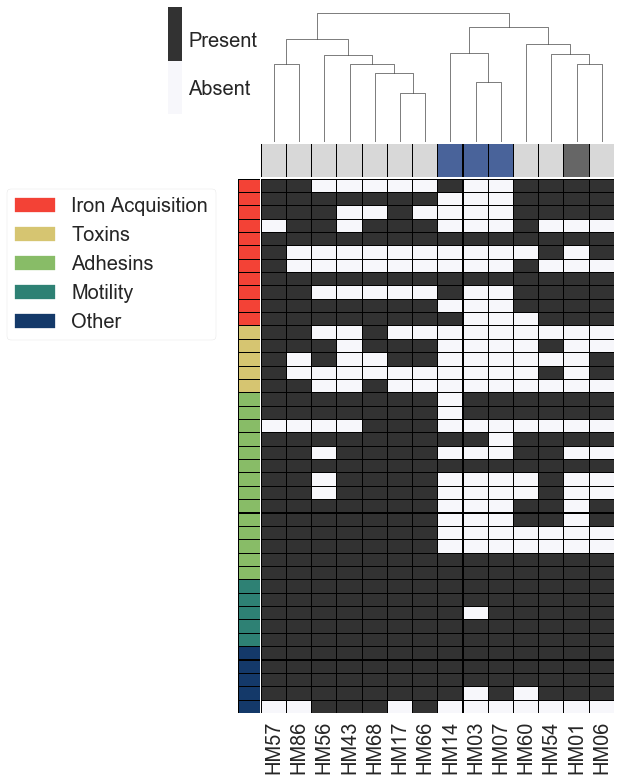

In [18]:
sns.set_style("white")
strain_cluster = scipy.cluster.hierarchy.linkage(pa_mat.T, method="average")#distances between strains
sns.set_context("notebook", font_scale=2)
# Mapping colors
num_colors = len(function.unique())# there's 5
function_to_color = dict(zip(function.unique(), clrs))
phylogroup_to_color = dict(zip(strain_info.PRED_PHYLO.unique(), ["#666666", "#49639a", "#d8d8d8"]))
row_colors = function.map(function_to_color)
row_colors.name =""
col_colors = strain_pg.PRED_PHYLO.map(phylogroup_to_color)
col_colors.name=""
cmap = ListedColormap(["#f7f7fb", "#323232"])
fig = plt.figure()
# #Drawind the heatmap
g = sns.clustermap(pa_mat, row_cluster=False, col_linkage=strain_cluster, 
                    row_colors=row_colors, col_colors=col_colors, cmap=cmap,
                   linewidth = 0.05, linecolor="black",
                    figsize=(8,13));

# # Adjusting the x and y labels
#la = g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation = 0, fontsize = 14);
la = g.ax_heatmap.set_yticklabels("");
# # Creating Legend
function_legend = [mpl.patches.Patch(color=c, label=l) for l,c in function_to_color.items()]
pg_legend = [mpl.patches.Patch(color=c, label=l) for l,c in phylogroup_to_color.items()]
l2 = g.ax_heatmap.legend(handles=function_legend, bbox_to_anchor=(-0.1,1), frameon=True)
# # Make a categorical colorbar

colorbar = g.ax_heatmap.collections[0].colorbar
colorbar.set_ticks([ 0.25, 0.7])
colorbar.set_ticklabels([ 'Absent', 'Present'])
colorbar.solids.set_edgecolor("face")
fn = os.path.join(figures_folder, today+"_figure_1a.png")

g.savefig(fn, dpi=500, bbox_inches = "tight")

In [12]:
cc_norm = norm_counts[[c for c in norm_counts.columns if "_" in c]]
norm_counts

,HM01,HM03,HM06,HM07,HM14,HM17,HM43,HM54,HM56,HM57,...,HM57_UR,HM57_UTI,HM60_UR,HM60_UTI,HM66_UR,HM66_UTI,HM68_UR,HM68_UTI,HM86_UR,HM86_UTI
c0166,0,0,0,0,0,PROKKA_01705,PROKKA_01414,PROKKA_01859,0,PROKKA_03810,...,0.613437,1.026317,-0.447759,-0.569133,-0.153954,0.080424,0.126057,-0.390827,-0.228037,-0.188571
c0185,PROKKA_04585,PROKKA_03080,PROKKA_03836,PROKKA_04519,PROKKA_04767,PROKKA_01690,PROKKA_01398,PROKKA_01874,PROKKA_04563,PROKKA_03825,...,2.199603,2.114964,0.956939,0.767844,2.159124,2.124091,1.986103,1.618578,2.083052,1.887543
c0350,0,0,PROKKA_03318,0,0,PROKKA_01536,0,0,PROKKA_00261,PROKKA_03975,...,0.811439,0.745996,NaN,NaN,0.433871,-0.191395,NaN,NaN,NaN,NaN
c0393,0,0,0,0,0,PROKKA_01439,0,PROKKA_02050,PROKKA_04358,PROKKA_04013,...,1.632975,0.630684,NaN,NaN,1.074937,0.847902,0.133982,1.426913,0.807017,-0.009043
c0400,PROKKA_04774,PROKKA_03259,PROKKA_03982,PROKKA_04727,PROKKA_00106,PROKKA_01435,PROKKA_01218,PROKKA_02055,PROKKA_04353,PROKKA_04018,...,-0.694743,-0.983501,-0.065414,-0.134437,-0.876478,-0.581692,-0.780478,-0.866517,-0.408751,-0.409017
c0405,PROKKA_04780,PROKKA_03267,PROKKA_03988,PROKKA_04734,PROKKA_00112,PROKKA_01430,PROKKA_01213,PROKKA_02061,PROKKA_04348,PROKKA_04024,...,-0.117851,0.508455,0.094997,-0.712785,0.383063,-1.285697,0.530722,-0.141915,-0.823029,-0.617869
c0652,PROKKA_00034,0,PROKKA_04226,PROKKA_02659,PROKKA_00433,PROKKA_01185,PROKKA_00977,PROKKA_02302,PROKKA_04964,PROKKA_04253,...,1.412741,1.733016,NaN,NaN,2.128938,2.075982,2.540283,1.397799,1.477915,1.654190
c1245,0,0,0,0,0,PROKKA_00650,0,0,0,0,...,NaN,NaN,NaN,NaN,0.633039,-0.191395,1.470288,0.664494,NaN,NaN
c1250,0,0,0,0,0,PROKKA_00644,0,0,PROKKA_04968,0,...,NaN,NaN,3.027248,1.105741,2.164351,1.654805,0.296327,0.416687,NaN,NaN
c1646,PROKKA_00749,0,PROKKA_05024,0,0,PROKKA_00310,PROKKA_00363,PROKKA_03014,PROKKA_03463,PROKKA_05006,...,-0.052482,0.169554,-0.201582,-0.197165,0.072316,0.760280,0.297422,-0.109705,-0.058446,-0.188571


In [13]:
meta
counts = meta.merge(cc_norm, left_index=True, right_index=True).set_index("gene_name")
counts_ur = counts[[c for c in counts.columns if "UR" in c ]]
counts_ur.columns = [c.split("_")[0] for c in counts_ur.columns]
counts_ur.index.name=""
counts_uti = counts[ [c for c in counts.columns if "UTI" in c ]]
counts_uti.columns = [c.split("_")[0] for c in counts_uti.columns]
counts_uti.index.name=""
counts_ur

,HM01,HM03,HM06,HM07,HM14,HM17,HM43,HM54,HM56,HM57,HM60,HM66,HM68,HM86
,,,,,,,,,,,,,,
iutA,0.768470,NaN,2.346065,NaN,-2.091922,NaN,NaN,2.138783,NaN,1.223245,2.895617,NaN,NaN,0.624093
chuA,2.323962,NaN,2.730478,NaN,NaN,2.150404,1.653759,2.191446,2.385261,2.229612,2.483832,2.594462,0.612465,1.697996
hma,2.698041,NaN,1.760149,NaN,NaN,-1.478356,NaN,1.959494,-1.418925,1.921734,-0.578370,NaN,NaN,-1.329457
iroN,NaN,NaN,NaN,NaN,NaN,2.308925,NaN,NaN,1.902539,NaN,3.027248,2.164351,0.296327,NaN
fhuA,2.255321,2.238870,2.557577,2.346945,2.202340,2.199217,2.044294,2.026428,2.157414,2.199603,0.956939,2.159124,1.986103,2.083052
iha,NaN,NaN,1.344446,NaN,NaN,NaN,NaN,0.951762,NaN,1.331920,NaN,NaN,NaN,NaN
ireA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.772251,1.981381,NaN,NaN,NaN
feoB,1.762887,1.991056,1.837628,1.571104,1.423517,1.680074,1.444342,1.174052,1.669454,1.232029,1.546785,1.703416,1.559351,1.710527
iucC,0.442633,NaN,2.289693,NaN,-1.764782,NaN,NaN,2.268715,NaN,1.215636,2.780387,NaN,NaN,-0.182106


//anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


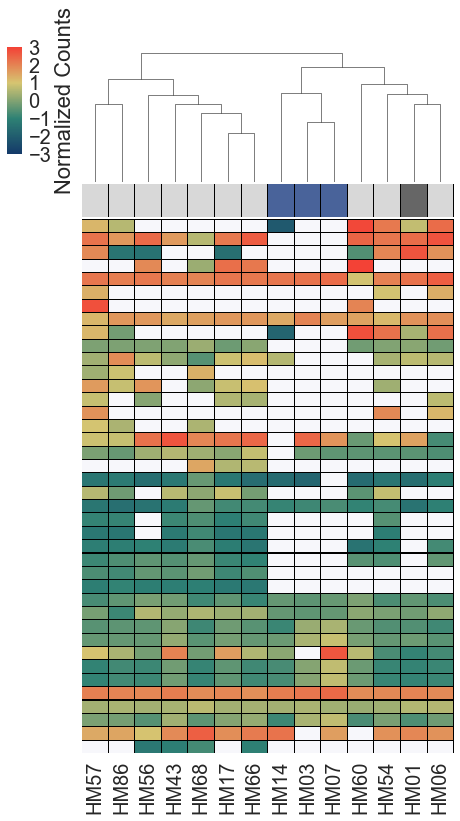

In [19]:
cmap = my_cmap
cmap.set_bad(color='#f7f7fb')
sns.set_style("white")
#Drawind the heatmap
ur_h = sns.clustermap(counts_ur, row_cluster=False, col_linkage=strain_cluster, 
                    col_colors=col_colors,cmap = cmap, 
                      linewidth = 0.05, linecolor='black',
                      vmax=3, vmin=-3,
                  figsize = (8,13), cbar_kws={"label":"Normalized Counts",
                                             });
# Adjusting the x and y labels
#la = ur_h.ax_heatmap.set_yticklabels(ur_h.ax_heatmap.get_yticklabels(), rotation = 0, fontsize = 14);
la = ur_h.ax_heatmap.set_yticklabels("");

fn = os.path.join(figures_folder, today+"_figure_1b.png")
ur_h.savefig(fn, dpi=500, bbox_inches = "tight")

//anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


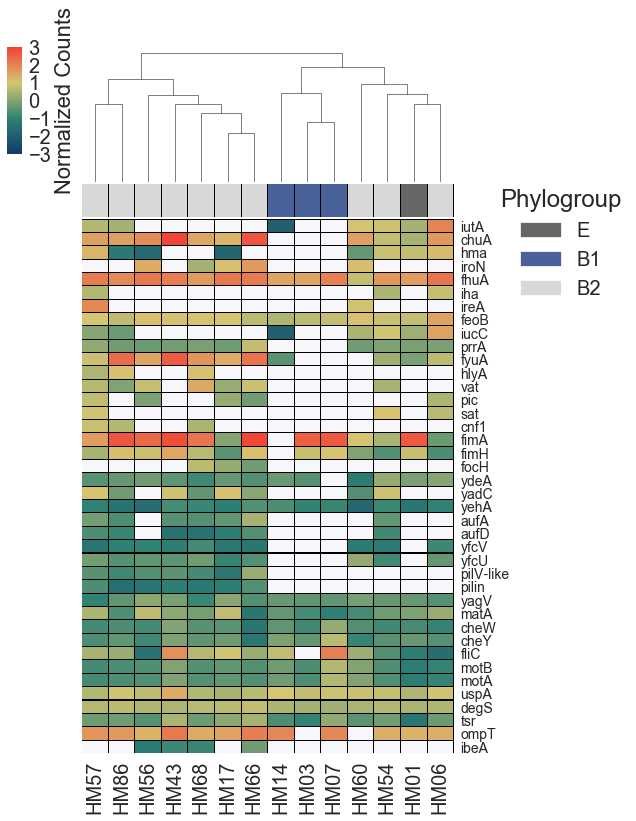

In [20]:
cmap = my_cmap
cmap.set_bad(color='#f7f7fb')
#Drawind the heatmap
col_colors.name = ''
uti_h = sns.clustermap(counts_uti, row_cluster=False, col_linkage=strain_cluster, 
                    col_colors=col_colors,cmap = cmap, 
                       linewidth = 0.05, linecolor = 'black',
                  figsize = (8,13), vmin = -3, vmax = 3, cbar_kws={"label":"Normalized Counts", 
                                                                   });
# Adjusting the x and y labels
la = uti_h.ax_heatmap.set_yticklabels(uti_h.ax_heatmap.get_yticklabels(), rotation = 0, fontsize = 14);
l2 = uti_h.ax_heatmap.legend(handles=pg_legend, bbox_to_anchor=(1.5,1.09))
l2.set_title("Phylogroup")
fn = os.path.join(figures_folder, today+"_figure_1c.png")
uti_h.savefig(fn, dpi=500, bbox_inches = "tight")